<a href="https://colab.research.google.com/github/tiagoflorin/DataScience1/blob/clase_6/ProyectoFinal%2BFlorin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Presentación del proyecto**

**Abstracto con Motivación y Audiencia**


Este proyecto de análisis exploratorio de datos (EDA) sobre Spotify busca comprender las tendencias actuales del consumo musical. Analizar las características de las canciones más reproducidas permite revelar patrones culturales y de comportamiento. La motivación es convertir los datos en información útil para artistas, productores y analistas del sector musical interesados en entender cómo se forman las preferencias de escucha.

**Contexto Comercial y Analítico**

Spotify concentra una enorme cantidad de información sobre hábitos y gustos musicales. Desde una mirada comercial, estos datos ayudan a optimizar estrategias de posicionamiento y segmentación. Desde lo analítico, el proyecto aplica herramientas de visualización y estadística descriptiva para detectar relaciones entre atributos sonoros (energía, ritmo, valencia, etc.) y popularidad.

**Preguntas/Hipótesis a Resolver mediante el Análisis de Datos**

Preguntas / Hipótesis a Resolver
¿Qué características sonoras predominan en las canciones más populares?
¿Cómo varían las preferencias musicales según el año de lanzamiento?
Hipótesis: Las canciones con mayor energía y ritmo bailable alcanzan mayores niveles de popularidad.

**Objetivo**

Identificar patrones de consumo y atributos musicales que influyen en la popularidad dentro de Spotify, generando insights que sirvan como base para estrategias futuras de marketing, producción y curaduría musical.

# **Lectura de datos**

**Librerias necesarias para el analisis de datos**

In [8]:
import pandas as pd


import matplotlib.pyplot as plt


import seaborn as sns

from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# Clases y funciones de Scikit-learn que usaremos
from sklearn.model_selection import train_test_split # Para dividir datos
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder # Para preprocesamiento
from sklearn.linear_model import LinearRegression, LogisticRegression # Modelos
from sklearn.neighbors import KNeighborsClassifier # Otro modelo de clasificación
from sklearn.tree import DecisionTreeClassifier # Otro modelo más
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Métricas para clasificación
from sklearn.metrics import mean_squared_error, r2_score # Métricas para regresión
from sklearn.datasets import load_iris, fetch_california_housing # Datasets de ejemplo
from sklearn.pipeline import Pipeline # Para encadenar pasos
from sklearn.compose import ColumnTransformer # Para aplicar transformaciones diferentes a columnas diferentes
from sklearn.impute import SimpleImputer # Para manejar valores faltantes

# Configuraciones adicionales para visualización
sns.set(style="ticks", color_codes=True)
plt.rcParams['figure.figsize'] = (10, 6)

**Configuración del entorno de Python en Google Colab**

In [8]:
# Configuraciones adicionales para visualización
sns.set(style="ticks", color_codes=True)
plt.rcParams['figure.figsize'] = (10, 6)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72600 entries, 0 to 72599
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   position          72600 non-null  int64  
 1   track_name        72585 non-null  object 
 2   artist            72585 non-null  object 
 3   streams           72600 non-null  int64  
 4   url               72600 non-null  object 
 5   year              72600 non-null  int64  
 6   month             72600 non-null  int64  
 7   day               72600 non-null  int64  
 8   region            72600 non-null  object 
 9   danceability      72600 non-null  float64
 10  energy            72600 non-null  float64
 11  key               72600 non-null  int64  
 12  loudness          72600 non-null  float64
 13  mode              72600 non-null  int64  
 14  speechiness       72600 non-null  float64
 15  acousticness      72600 non-null  float64
 16  instrumentalness  72600 non-null  float6

**Lectura del dataset**

In [22]:
# Cargar el dataset y crear el dataframe
url = 'https://raw.githubusercontent.com/tiagoflorin/DataScience1/refs/heads/clase_6/global.csv'
df = pd.read_csv(url)



**Análisis inicial del dataset**

In [11]:
df.describe()

,position,streams,year,month,day,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,72600.000000,7.260000e+04,72600.000000,72600.000000,72600.000000,72600.000000,72600.000000,72600.000000,72600.000000,72600.000000,72600.000000,72600.000000,72600.000000,72600.000000,72600.000000,72600.000000,72600.000000,72600.000000
mean,50.500000,1.570602e+06,2017.502755,6.537190,15.688705,0.705666,0.655617,5.251983,-5.799829,0.584931,0.113260,0.190761,0.005666,0.159859,0.501079,118.811926,212103.241309,3.979545
std,28.866269,9.114492e+05,0.499996,3.452275,8.767302,0.127700,0.149827,3.715792,2.037871,0.492737,0.101317,0.202978,0.044727,0.107072,0.218979,28.513787,37899.523985,0.170910
min,1.000000,5.497840e+05,2017.000000,1.000000,1.000000,0.176000,0.005430,0.000000,-22.507000,0.000000,0.023200,0.000031,0.000000,0.021500,0.037000,46.718000,31200.000000,1.000000
25%,25.750000,9.579698e+05,2017.000000,4.000000,8.000000,0.630000,0.554000,1.000000,-6.855000,0.000000,0.047600,0.039300,0.000000,0.093300,0.338000,96.133000,190932.000000,4.000000
50%,50.500000,1.280397e+06,2018.000000,7.000000,16.000000,0.724000,0.668000,5.000000,-5.535000,1.000000,0.071400,0.119000,0.000000,0.118000,0.492000,112.502000,210240.000000,4.000000
75%,75.250000,1.867071e+06,2018.000000,10.000000,23.000000,0.791000,0.782000,8.000000,-4.328000,1.000000,0.135000,0.258000,0.000016,0.184000,0.678000,139.028000,229573.000000,4.000000
max,100.000000,1.138152e+07,2018.000000,12.000000,31.000000,0.968000,0.978000,11.000000,0.175000,1.000000,0.966000,0.994000,0.942000,0.914000,0.982000,212.117000,487960.000000,5.000000


**Descripción de variables**

Una breve descripción de los atributos:

position: Posición en el ranking en ese día.

stream: Número de reproducciones en ese día.

year: Año del ranking.

month: Mes del ranking.

día: Día del ranking.

danceability: Que tan bailable es una canción (0.0 - 1.0)

energy: Medida de intensidad y actividad. Las canciones energéticas son rápidas y ruidosas (Por ejemplo, Death Metal), mientras que un preludio de Bach tendría una intensidad baja.

key: Clave de la canción. Los valores que toma son Do (0), Do#/♭ (1), Re (2) ... hasta Si(11). Si no se pudo detectar una clave, el valor es -1.

loudness: Media del ruido de una canción (en dB).

mode: Modalidad de la canción: Menor (0) o Mayor (1).

speechiness: Presencia de palabras habladas en la pista de audio. Por encima de 0.66 son audios donde solo hay casi exclusivamente voz. Entre 0.66 y 0.33 entran canciones que combinan tanto música como voz (por ejemplo, el rap). Por debajo de 0.33 estaría la música y otros audios sin voz.

acousticness: Confianza de que una canción sea más o menos acústica (vs digital).

instrumentalness: Si una canción contiene o no voces.

liveness: Si una canción se ha grabado "en vivo" o no. Por encima de 0.8 es muy probable que sea en vivo.

valence: El positivismo de una canción. Cuando el valor es cercano a 1.0, la canción es más alegre, mientras que las canciones con valencia baja tienden a ser más tristes.

tempo: El tempo medio estimado en "beats per minute" (BPM). Es sinónimo de la velocidad de una canción.

duration_ms: Duración total del track.

time_signature: Compás medio del track. Mide las pulsaciones que hay por cada compás.

# **Data Wrangling - Limpieza y transformación de datos**

**Valores duplicados**

**Valores nulos**

**Tratamiento de valores outliers**

**Otras transformaciones, normalización, fechas**

# **Análisis Exploratorio de datos**

**Análisis univariado**

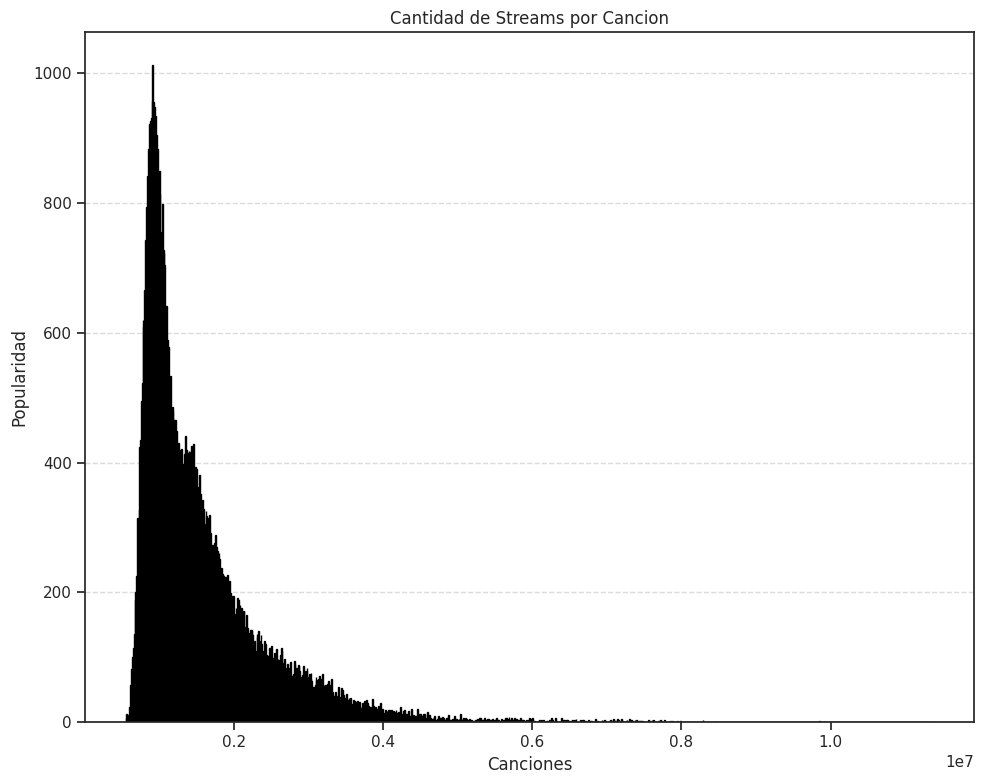

In [12]:
plt.figure(figsize=(10, 8))
plt.hist(df.streams, bins=1000, color='skyblue', edgecolor='black')

# Etiquetas y título
plt.title("Cantidad de Streams por Cancion")
plt.xlabel("Canciones")
plt.ylabel("Popularidad")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Análisis bivariado**

**Análisis multivariado**

**Conclusiones del EDA**

MACHINE LEARNING

In [31]:
# Separar Features (X) y Target (y)
columnas_a_excluir = ['track_name', 'artist', 'url','region']
y_reg = df.streams
X_reg = df.drop(columns=['streams'] + columnas_a_excluir, axis=1)

# Dividir en entrenamiento y prueba
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

print("\nDimensiones de los conjuntos de regresión:")
print("X_reg_train:", X_reg_train.shape, "y_reg_train:", y_reg_train.shape)
print("X_reg_test:", X_reg_test.shape, "y_reg_test:", y_reg_test.shape)



Dimensiones de los conjuntos de regresión:
X_reg_train: (58080, 17) y_reg_train: (58080,)
X_reg_test: (14520, 17) y_reg_test: (14520,)


In [32]:
# Crear un Pipeline para regresión
pipeline_reg = Pipeline([
    ('scaler', StandardScaler()),      # Paso 1: Escalar
    ('regressor', LinearRegression())  # Paso 2: Modelo de Regresión Lineal
])

# Entrenar el pipeline
pipeline_reg.fit(X_reg_train, y_reg_train)

print("Pipeline de Regresión entrenado.")


Pipeline de Regresión entrenado.


In [33]:
# Realizar predicciones
y_reg_pred = pipeline_reg.predict(X_reg_test)

# Evaluar el modelo de regresión
mse = mean_squared_error(y_reg_test, y_reg_pred)
r2 = r2_score(y_reg_test, y_reg_pred) # También se puede usar pipeline_reg.score(X_reg_test, y_reg_test)

print(f"\nEvaluación del Modelo de Regresión Lineal:")
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")

# Comparar algunas predicciones con los valores reales
print("\nAlgunas predicciones vs valores reales:")
comparison_df = pd.DataFrame({'Real': y_reg_test[:10], 'Predicho': y_reg_pred[:10]})
print(comparison_df)


Evaluación del Modelo de Regresión Lineal:
Error Cuadrático Medio (MSE): 287474068557.0757
Coeficiente de Determinación (R²): 0.6603

Algunas predicciones vs valores reales:
          Real      Predicho
40439  1469277  1.933848e+06
36284   811640  6.767109e+05
38994   889824  4.817117e+05
53725  1961382  2.216419e+06
906    2636733  2.604350e+06
16311  2811139  2.497290e+06
33300  4844938  2.787679e+06
25725  1949488  2.148878e+06
53326  2044927  2.199361e+06
15743  1324708  1.657884e+06


Conclusiones



## Hipótesis

### 1. Hipótesis Nula ($H_0$)
La hipótesis nula establece que el modelo no tiene ningún poder predictivo o explicativo.

$H_0$: El modelo es inútil. Formalmente, el conjunto de variables predictoras (todas las características musicales y de contexto que usaste) **no explica** la varianza en el número de streams. (El Coeficiente de Determinación es $0$).

### 2. Hipótesis Alternativa ($H_a$)
La hipótesis alternativa establece que el modelo sí tiene un poder explicativo.

$H_a$: El modelo es útil. Formalmente, el conjunto de variables predictoras **sí explica una proporción significativa** de la varianza en el número de streams. (El Coeficiente de Determinación es mayor a $0$).

**Conclusión Estadística (Fallo de la Hipótesis)**
Dado que tu modelo logró un **Coeficiente de Determinación** de $0.6603$ (significativamente diferente de cero):

Decisión: Se **Rechaza la Hipótesis Nula ($H_0$)**.

Significado: Esto concluye que **existe una relación estadísticamente significativa** entre las características de las canciones y su popularidad medida en streams. Tu modelo de Regresión Lineal **es mejor que adivinar al azar**.

---

## Conclusiones del Modelo

### 1. Conclusión sobre el Poder Explicativo (Coeficiente de Determinación)
El modelo funciona, pero no perfectamente.

Tu modelo de Regresión Lineal puede explicar el **66% de la razón por la cual unas canciones tienen más streams que otras**. Esto significa que las características que elegiste son **buenos indicadores de la popularidad**.

### 2. Conclusión sobre la Precisión del Error (MSE/RMSE)
El error promedio es grande.

Aunque el modelo capta la tendencia, la predicción promedio para una canción individual se desvía en unos **536,000 streams** (basado en el RMSE). Esto es un error considerable, lo que sugiere que tu modelo **es bueno para predecir rangos** o popularidad general, pero **impreciso en las cifras exactas**.

### 3. Conclusión sobre las Limitaciones
Faltan variables o el modelo es simple.

El **34%** de la variación en los streams **no es explicada** por tus datos. Esta falta de explicación se debe probablemente a:
Variables Faltantes: Influencias externas (marketing, redes sociales, noticias).
No-Linealidad: La Regresión Lineal no es adecuada para capturar la forma en que las canciones con **muchos streams** (los hits o *outliers*) se disparan, ya que tiende a "promediar" la predicción. Necesitas un modelo más avanzado.